In [1]:
pip show scikit-learn

Name: scikit-learn
Version: 0.22.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\programdata\anaconda3\lib\site-packages
Requires: numpy, scipy, joblib
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
house = pd.read_csv(r'C:\Users\Akhtar\Documents\Notes-master\home_data.csv')

In [18]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [20]:
x = house [['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors','sqft_above','sqft_lot15',
      'condition','yr_built','zipcode']]

In [21]:
y = house ['price']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x.shape

(21613, 10)

In [24]:
y.shape

(21613,)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7) 

In [26]:
print (x_train.shape, y_train.shape)

(15129, 10) (15129,)


In [27]:
print (x_test.shape, y_test.shape)

(6484, 10) (6484,)


In [28]:
house1 = house[house['id']==6414100192]

In [29]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639


In [30]:
house1['price']

1    538000
Name: price, dtype: int64

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [32]:
model = LinearRegression()

In [33]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
prediction = model.predict(x_test)

In [35]:
prediction[1]

724004.5295810653

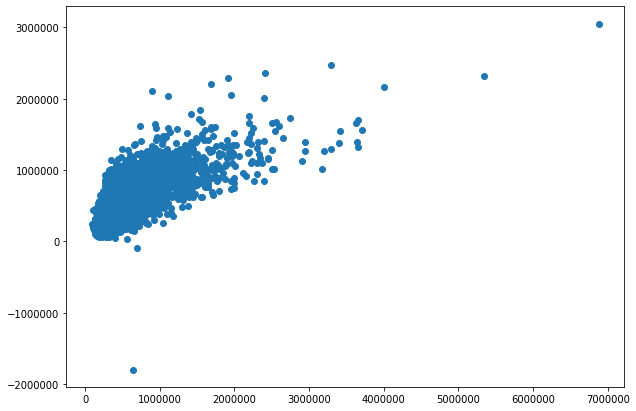

In [36]:
plt.figure(figsize=(10,7))
plt.scatter(y_test, prediction)

In [37]:
model.coef_

array([-7.58573425e+04,  6.96682635e+04,  2.93038297e+02, -1.21470730e-01,
        5.53104015e+04,  1.87227471e+01, -5.14845198e-01,  1.85958533e+04,
       -3.30371439e+03,  9.25438729e+01])

In [38]:
dframe_coef = pd.DataFrame(model.coef_, x.columns, columns = ['coffice value'])

In [39]:
dframe_coef

,coffice value
bedrooms,-75857.342535
bathrooms,69668.263452
sqft_living,293.038297
sqft_lot,-0.121471
floors,55310.401451
sqft_above,18.722747
sqft_lot15,-0.514845
condition,18595.853340
yr_built,-3303.714393
zipcode,92.543873


In [40]:
model.intercept_

-2698328.804697926

In [41]:
# Root Mean Square Error (RMSE)

In [42]:
from sklearn import metrics

In [43]:
mean_sq_err = metrics.mean_squared_error(y_test, prediction)

In [44]:
RMSE = np.sqrt(mean_sq_err)

In [45]:
RMSE

247262.41780748148

In [48]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  